In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chisquare 
from scipy import stats 
import scipy as sp 

from statsmodels.formula.api import ols, logit, glm 

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

In [2]:
상위20대여소 = pd.read_csv('../../Data/따릉이/쏠림정도_top20_대여소.csv',encoding='utf-8')

In [3]:
상위20대여소

,Unnamed: 0,최종용도,대여소_ID,temp_num,출근대여량,출근반납량,대여-반납량_출근,차이절대값_출근,총이용량_출근,퇴근대여량,퇴근반납량,대여-반납량_퇴근,차이절대값_퇴근,총이용량_퇴근,출퇴근_총이용량,차이절대값합
0,0,상업,ST-1064,180,3764,8489,-4725,4725,12253,9005,5562,3443,3443,14567,26820,8168
1,1,상업,ST-1688,188,881,7017,-6136,6136,7898,7922,3320,4602,4602,11242,19140,10738
2,2,상업,ST-1712,193,698,11208,-10510,10510,11906,7548,754,6794,6794,8302,20208,17304
3,3,상업,ST-2031,182,18661,22323,-3662,3662,40984,27533,22552,4981,4981,50085,91069,8643
4,4,상업,ST-2033,195,927,17721,-16794,16794,18648,14171,3574,10597,10597,17745,36393,27391
5,5,상업,ST-2035,194,1306,13073,-11767,11767,14379,10752,3553,7199,7199,14305,28684,18966
6,6,상업,ST-2044,190,1911,11044,-9133,9133,12955,6995,1434,5561,5561,8429,21384,14694
7,7,상업,ST-2569,176,889,4972,-4083,4083,5861,4068,1503,2565,2565,5571,11432,6648
8,8,상업,ST-2871,186,5501,10328,-4827,4827,15829,10568,6131,4437,4437,16699,32528,9264
9,9,상업,ST-2945,177,1201,6098,-4897,4897,7299,5019,2183,2836,2836,7202,14501,7733


In [4]:
강서_따릉이_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')

In [5]:
출근 = 강서_따릉이_데이터[(강서_따릉이_데이터['기준_시간대'] >= 600) & (강서_따릉이_데이터['기준_시간대'] <= 1000)]
퇴근 = 강서_따릉이_데이터[(강서_따릉이_데이터['기준_시간대'] >= 1700) & (강서_따릉이_데이터['기준_시간대'] <= 2100)]

In [6]:
출근

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
609,2023-05-08,600,ST-1253,ST-1676,1,10,1248,0,0,0
610,2023-05-08,600,ST-1253,ST-1718,1,3,762,0,0,0
611,2023-05-08,600,ST-1253,ST-2031,1,3,830,0,0,0
612,2023-05-08,600,ST-1254,ST-2858,1,4,1104,0,0,0
613,2023-05-08,600,ST-1351,ST-2550,1,8,2010,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1733236,2023-12-06,1000,ST-2557,ST-1249,1,5,870,2,0,0
1733237,2023-12-06,1000,ST-2056,ST-2049,1,1,270,2,0,0
1733238,2023-12-06,1000,ST-2045,ST-2042,1,4,746,2,0,0
1733239,2023-12-06,1000,ST-1251,ST-2044,1,8,1118,2,0,0


In [7]:
temp_df = 출근.groupby(['기준_날짜','시작_대여소_ID'])['전체_건수'].sum()
temp_df = pd.DataFrame(temp_df)
temp_df = temp_df.reset_index()
temp_df['기준_날짜'] = pd.to_datetime(temp_df['기준_날짜'])
temp_df

,기준_날짜,시작_대여소_ID,전체_건수
0,2023-04-03,ST-1062,32
1,2023-04-03,ST-1063,61
2,2023-04-03,ST-1064,34
3,2023-04-03,ST-1065,57
4,2023-04-03,ST-1067,32
...,...,...,...
21485,2024-03-27,ST-829,10
21486,2024-03-27,ST-831,18
21487,2024-03-27,ST-834,22
21488,2024-03-27,ST-835,30


In [8]:
testdf = temp_df.copy()

In [9]:
testdf

,기준_날짜,시작_대여소_ID,전체_건수
0,2023-04-03,ST-1062,32
1,2023-04-03,ST-1063,61
2,2023-04-03,ST-1064,34
3,2023-04-03,ST-1065,57
4,2023-04-03,ST-1067,32
...,...,...,...
21485,2024-03-27,ST-829,10
21486,2024-03-27,ST-831,18
21487,2024-03-27,ST-834,22
21488,2024-03-27,ST-835,30


In [10]:
testdf = testdf[testdf['시작_대여소_ID'] == 'ST-1062']

In [11]:
testdf

,기준_날짜,시작_대여소_ID,전체_건수
0,2023-04-03,ST-1062,32
252,2023-04-10,ST-1062,30
432,2023-04-11,ST-1062,31
612,2023-04-14,ST-1062,20
793,2023-04-17,ST-1062,19
...,...,...,...
20563,2024-03-18,ST-1062,28
20748,2024-03-19,ST-1062,25
20932,2024-03-21,ST-1062,34
21118,2024-03-25,ST-1062,37


In [12]:
testdf['Timestamp'] = testdf['기준_날짜'].astype('int64')

C:\Users\USER\AppData\Local\Temp\ipykernel_11836\3902244988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['Timestamp'] = testdf['기준_날짜'].astype('int64')


In [13]:
testdf

,기준_날짜,시작_대여소_ID,전체_건수,Timestamp
0,2023-04-03,ST-1062,32,1680480000000000000
252,2023-04-10,ST-1062,30,1681084800000000000
432,2023-04-11,ST-1062,31,1681171200000000000
612,2023-04-14,ST-1062,20,1681430400000000000
793,2023-04-17,ST-1062,19,1681689600000000000
...,...,...,...,...
20563,2024-03-18,ST-1062,28,1710720000000000000
20748,2024-03-19,ST-1062,25,1710806400000000000
20932,2024-03-21,ST-1062,34,1710979200000000000
21118,2024-03-25,ST-1062,37,1711324800000000000


In [14]:
testdf['Timestamp'].values

array([1680480000000000000, 1681084800000000000, 1681171200000000000,
       1681430400000000000, 1681689600000000000, 1681862400000000000,
       1682294400000000000, 1682380800000000000, 1682553600000000000,
       1682640000000000000, 1683504000000000000, 1683590400000000000,
       1683676800000000000, 1683849600000000000, 1684108800000000000,
       1684195200000000000, 1684281600000000000, 1684454400000000000,
       1684800000000000000, 1685059200000000000, 1685577600000000000,
       1685664000000000000, 1686182400000000000, 1686268800000000000,
       1686873600000000000, 1687392000000000000, 1687478400000000000,
       1687996800000000000, 1688601600000000000, 1688688000000000000,
       1688947200000000000, 1689033600000000000, 1689120000000000000,
       1689638400000000000, 1689811200000000000, 1689897600000000000,
       1690156800000000000, 1690243200000000000, 1690329600000000000,
       1690761600000000000, 1690934400000000000, 1691020800000000000,
       1691107200000

In [17]:
testdf

,기준_날짜,시작_대여소_ID,전체_건수,Timestamp
0,2023-04-03,ST-1062,32,1680480000000000000
252,2023-04-10,ST-1062,30,1681084800000000000
432,2023-04-11,ST-1062,31,1681171200000000000
612,2023-04-14,ST-1062,20,1681430400000000000
793,2023-04-17,ST-1062,19,1681689600000000000
...,...,...,...,...
20563,2024-03-18,ST-1062,28,1710720000000000000
20748,2024-03-19,ST-1062,25,1710806400000000000
20932,2024-03-21,ST-1062,34,1710979200000000000
21118,2024-03-25,ST-1062,37,1711324800000000000


In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

X = testdf['Timestamp'].values.reshape(-1, 1)
Y = testdf['전체_건수']

# sns.scatterplot(x=X, y=Y, data=testdf)
# plt.title('출근시간 대여소별 대여량 산점도')

# 다항 회귀 모델 설정
poly = PolynomialFeatures(degree=2)  # 추세선의 차수를 3으로 설정
X_poly = poly.fit_transform(X)

# 회귀 분석 결과 요약 구하는 코드
model = sm.OLS(Y, X_poly)

result = model.fit()

sns.lmplot(x=X, y=Y, data=testdf['Timestamp'])
plt.title('출근시간 대여소별 대여량 산점도')

print(result.summary())

plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 119) + inhomogeneous part.

In [18]:
# # Sample DataFrame with Timestamp and '전체_건수' (Usage) data
# X = testdf['Timestamp']
# Y = testdf['전체_건수']

# # Scatterplot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=X, y=Y, data=testdf)
# plt.title('Scatterplot of Usage by Timestamp')
# plt.xlabel('Timestamp')
# plt.ylabel('Usage')

# # Polynomial regression model fitting
# poly = PolynomialFeatures(degree=3)  # Degree 2 polynomial
# X_poly = poly.fit_transform(X.values.reshape(-1, 1))

# # Fit the regression model
# model = sm.OLS(Y, X_poly)
# result = model.fit()

# # Visualize the regression line
# x_values = np.linspace(X.min(), X.max(), 100)
# x_values_poly = poly.fit_transform(x_values.reshape(-1, 1))
# predicted_values = result.predict(x_values_poly)

# plt.plot(x_values, predicted_values, color='red', label='Polynomial Regression')
# plt.legend()
# plt.show()

# # Print the regression model summary
# print(result.summary())

C:\Users\USER\AppData\Local\Temp\ipykernel_11836\2801835178.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.dropna(inplace=True)  # 결측치가 있는 행 제거


                            OLS Regression Results                            
Dep. Variable:                  전체_건수   R-squared:                      -0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 09 May 2024   Prob (F-statistic):                nan
Time:                        10:25:58   Log-Likelihood:                -481.48
No. Observations:                 119   AIC:                             965.0
Df Residuals:                     118   BIC:                             967.7
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.093e-35   4.43e-37     24.676      0.0

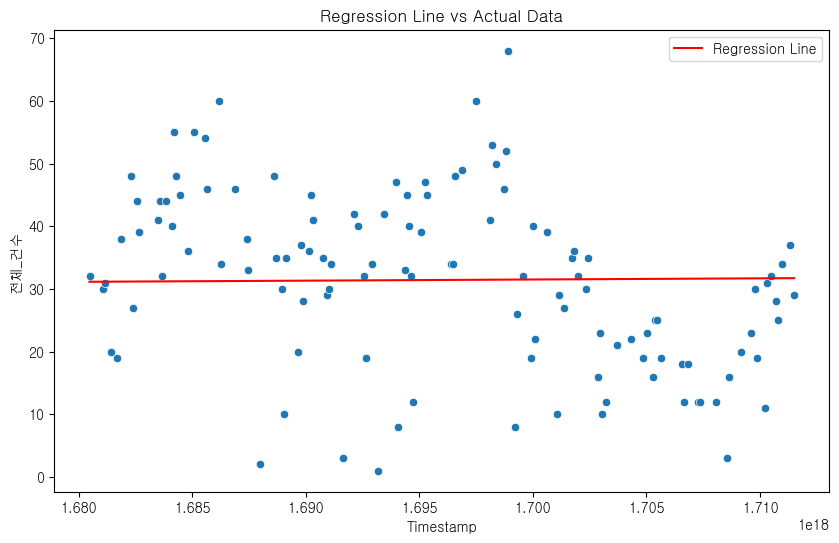

In [25]:
import statsmodels.api as sm

# 회귀 분석을 위한 데이터셋 준비
testdf.dropna(inplace=True)  # 결측치가 있는 행 제거
X = testdf['Timestamp']
y = testdf['전체_건수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 회귀 결과 요약
print(model.summary())

# 회귀 직선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Timestamp', y='전체_건수', data=testdf)
plt.plot(X['Timestamp'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Timestamp')
plt.ylabel('전체_건수')
plt.title('Regression Line vs Actual Data')
plt.legend()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11836\1457125870.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.dropna(inplace=True)  # 결측치가 있는 행 제거


                            OLS Regression Results                            
Dep. Variable:                  전체_건수   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.903
Date:                Thu, 09 May 2024   Prob (F-statistic):             0.0589
Time:                        10:27:54   Log-Likelihood:                -478.00
No. Observations:                 119   AIC:                             962.0
Df Residuals:                     116   BIC:                             970.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.068e-35   4.43e-37     24.088      0.0

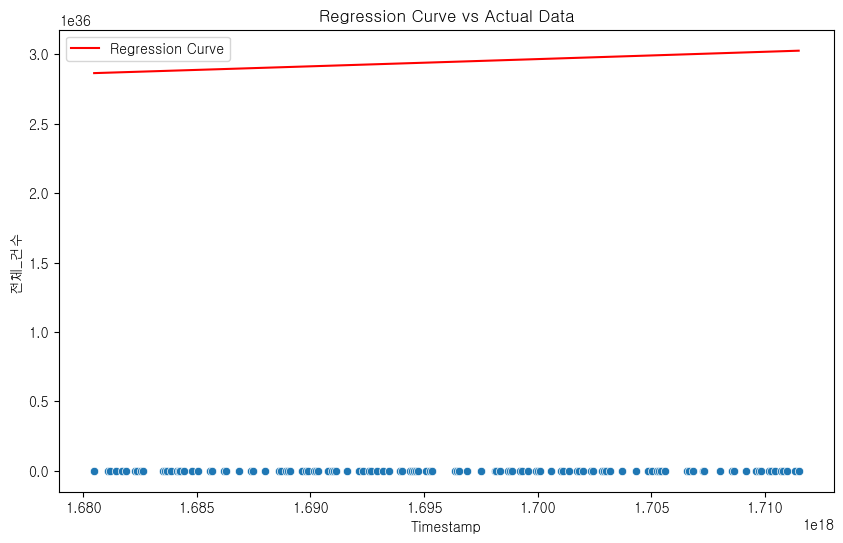

In [27]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 회귀 분석을 위한 데이터셋 준비
testdf.dropna(inplace=True)  # 결측치가 있는 행 제거
X = testdf['Timestamp']
y = testdf['전체_건수']

# 다항 회귀 모델 설정
poly_degree = 3  # 다항식의 차수 (곡선의 차수)
poly_features = np.column_stack([X**i for i in range(1, poly_degree+1)])  # 다항 특성 생성
X_poly = sm.add_constant(poly_features)  # 상수항 추가

# 회귀 모델 적합
model = sm.OLS(y, X_poly).fit()

# 회귀 결과 요약
print(model.summary())

# 회귀 곡선 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Timestamp', y='전체_건수', data=testdf)
X_range = np.linspace(X.min(), X.max(), 100)  # 회귀 곡선을 그리기 위한 X 범위 생성
X_range_poly = np.column_stack([X_range**i for i in range(1, poly_degree+1)])  # 다항식 형태로 변환
plt.plot(X_range, model.predict(sm.add_constant(X_range_poly)), color='red', label='Regression Curve')
plt.xlabel('Timestamp')
plt.ylabel('전체_건수')
plt.title('Regression Curve vs Actual Data')
plt.legend()
plt.show()

In [20]:
상위20대여소

,Unnamed: 0,최종용도,대여소_ID,temp_num,출근대여량,출근반납량,대여-반납량_출근,차이절대값_출근,총이용량_출근,퇴근대여량,퇴근반납량,대여-반납량_퇴근,차이절대값_퇴근,총이용량_퇴근,출퇴근_총이용량,차이절대값합
0,0,상업,ST-1064,180,3764,8489,-4725,4725,12253,9005,5562,3443,3443,14567,26820,8168
1,1,상업,ST-1688,188,881,7017,-6136,6136,7898,7922,3320,4602,4602,11242,19140,10738
2,2,상업,ST-1712,193,698,11208,-10510,10510,11906,7548,754,6794,6794,8302,20208,17304
3,3,상업,ST-2031,182,18661,22323,-3662,3662,40984,27533,22552,4981,4981,50085,91069,8643
4,4,상업,ST-2033,195,927,17721,-16794,16794,18648,14171,3574,10597,10597,17745,36393,27391
5,5,상업,ST-2035,194,1306,13073,-11767,11767,14379,10752,3553,7199,7199,14305,28684,18966
6,6,상업,ST-2044,190,1911,11044,-9133,9133,12955,6995,1434,5561,5561,8429,21384,14694
7,7,상업,ST-2569,176,889,4972,-4083,4083,5861,4068,1503,2565,2565,5571,11432,6648
8,8,상업,ST-2871,186,5501,10328,-4827,4827,15829,10568,6131,4437,4437,16699,32528,9264
9,9,상업,ST-2945,177,1201,6098,-4897,4897,7299,5019,2183,2836,2836,7202,14501,7733


In [23]:
import plotly.graph_objects as go

x = 상위20대여소['대여소_ID']
y1 = 상위20대여소['대여-반납량_출근'].abs()
y2 = 상위20대여소['대여-반납량_퇴근'].abs()

bar_color = '#336666'
bar_color2 = '#33cc99'

fig = go.Figure()

fig.add_trace(go.Bar(x=x, y=y1, name='대여-반납량(출근)', marker=dict(color=bar_color)))
fig.add_trace(go.Bar(x=x, y=y2, name='대여-반납량(퇴근)', marker=dict(color=bar_color2)))

fig.update_layout(title='상위 20개 대여소 비교', xaxis_title='대여소 ID', yaxis_title='대여-반납량의 절대값')

fig.update_layout(width=800, height=600)
fig.show()

In [24]:
import plotly.graph_objects as go

x = 상위20대여소['대여소_ID']
y1 = 상위20대여소['차이절대값합']

bar_color = '#336666'

fig = go.Figure()

fig.add_trace(go.Bar(x=x, y=y1, name='쏠림정도 수치화',marker=dict(color=bar_color)))

fig.update_layout(title='상위 20개 대여소 비교', xaxis_title='대여소 ID', yaxis_title='쏠림정도 수치화')

fig.update_layout(width=800, height=600)
fig.show()